
# Logistic Regression

## Introduction

In this notebook, we will implement logistic regression to understand how it works behind the scenes. Logistic regression is used for binary classification, predicting whether a given input belongs to class 1 (positive) or class 0 (negative). Unlike linear regression which outputs a continuous value, logistic regression uses a sigmoid activation function to map input values to a probability between 0 and 1.

We will also explore the **logit function**, **sigmoid activation**, **binary cross-entropy loss**, and **gradient descent optimization**. 

### Required Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

### Generate and Visualize Synthetic Data
In this section, we generate a synthetic dataset using NumPy for binary classification. This simplifies understanding while preserving logistic regression’s core mechanics.

We use a scatter plot to visualize how the two classes are distributed in feature space. This helps build intuition for why logistic regression might be a good choice: we can observe whether the classes are linearly separable.

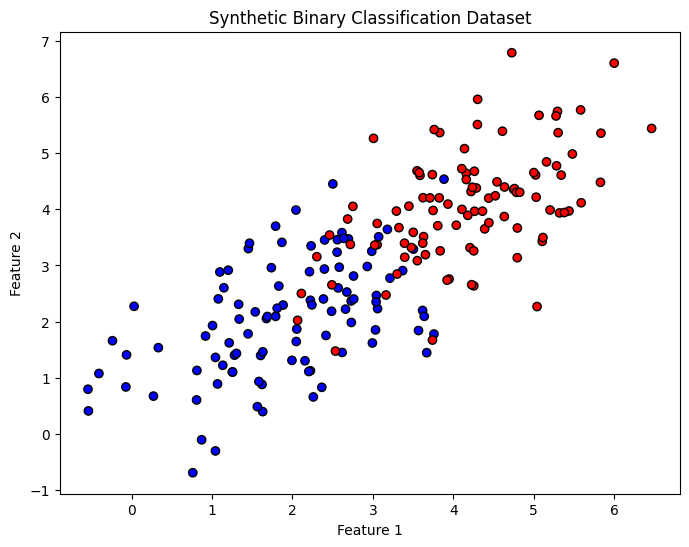

In [9]:
# Create simple synthetic dataset
np.random.seed(0)
n_samples = 200
X_class0 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0.5], [0.5, 1]], size=n_samples//2)
X_class1 = np.random.multivariate_normal(mean=[4, 4], cov=[[1, 0.5], [0.5, 1]], size=n_samples//2)

X = np.vstack((X_class0, X_class1))
y = np.array([0]*(n_samples//2) + [1]*(n_samples//2))

# Visualize the data
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.show()

### Sigmoid Function
The sigmoid function maps any real-valued input to a probability between 0 and 1. It's the core of logistic regression.

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Logistic Regression
Here, we build a logistic regression model from scratch. The model includes:
- Initialization of weights and bias
- Forward pass using sigmoid activation
- Binary cross-entropy loss
- Gradient descent to update weights

1. **Linear Combination (Logit Function):**
   For each observation, the model computes a weighted sum of inputs:
   $$
   z = \mathbf{w} \cdot \mathbf{x} + b
   $$
   where:
   - $\mathbf{x}$ is the feature vector,
   - $\mathbf{w}$ is the weight vector,
   - $b$ is the bias term.

2. **Sigmoid Activation Function:**
   The sigmoid function "squashes" the linear output into a probability between 0 and 1:
   $$
   \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
   This value can be interpreted as the **probability that the input belongs to class 1**.

3. **Binary Cross-Entropy Loss:**
   We use the binary cross-entropy loss function to quantify prediction error:
   $$
   \mathcal{L} = -\frac{1}{N} \sum_{i=1}^N \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
   $$
   This loss penalizes confident wrong predictions more heavily than uncertain ones, which encourages the model to improve its probability estimates.

4. **Gradient Descent Optimization:**
   We update weights and bias using the gradients of the loss:
   - For each weight $w_j$:
     $$
     w_j \leftarrow w_j - \alpha \frac{\partial \mathcal{L}}{\partial w_j}
     $$
   - For the bias:
     $$
     b \leftarrow b - \alpha \frac{\partial \mathcal{L}}{\partial b}
     $$
   where $\alpha$ is the **learning rate**.

5. **Prediction Rule:**
   After training, we use a threshold (usually 0.5) to convert probabilities into class labels:
   $$
   \hat{y}_{\text{class}} = 
   \begin{cases}
   1 & \text{if } \hat{y} \geq 0.5 \\
   0 & \text{otherwise}
   \end{cases}
   $$


In [13]:
class LogisticRegression:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = -np.mean(y * np.log(y_predicted + 1e-9) + (1 - y) * np.log(1 - y_predicted + 1e-9))
            self.loss_history.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_probs = self.predict_proba(X)
        return np.where(y_probs >= 0.5, 1, 0)

### Train the Model
Now we instantiate our model and train it on the full dataset. We track the loss during training to see if gradient descent is working correctly.

In [20]:
model = LogisticRegression(lr=0.1, epochs=1000)
model.fit(X, y)

### Plot Loss Curve
The curve shows how the binary cross-entropy loss decreases over time, indicating that the model is learning.

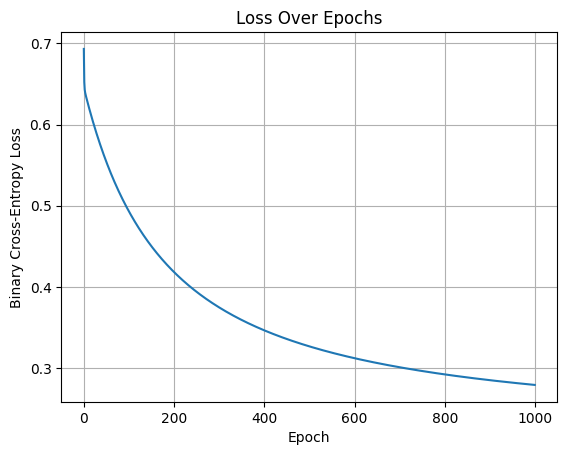

In [22]:
plt.plot(model.loss_history)
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

### Evaluate the Model
After training, we predict on the test set and evaluate the results using:
- **Accuracy**: Proportion of correctly classified samples
- **Classification Report**: Includes precision, recall, and F1-score
- **Confusion Matrix**: Visualizes true vs predicted labels

These metrics help us understand both the performance and any potential imbalances or biases in predictions.

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.88      0.92      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



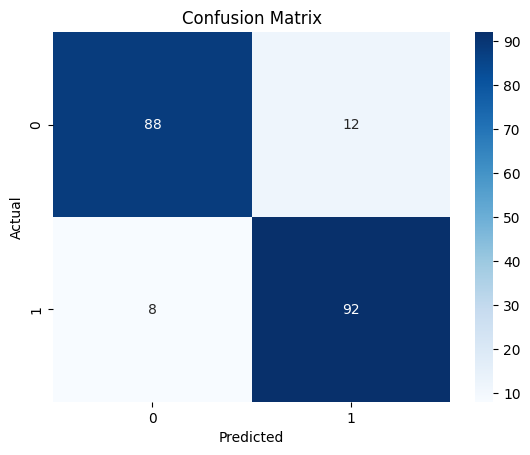

In [24]:
y_pred = model.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Visualize Decision Boundary
This plot shows the boundary where the model switches from predicting class 0 to class 1. It gives a clear visual of what the model has learned.

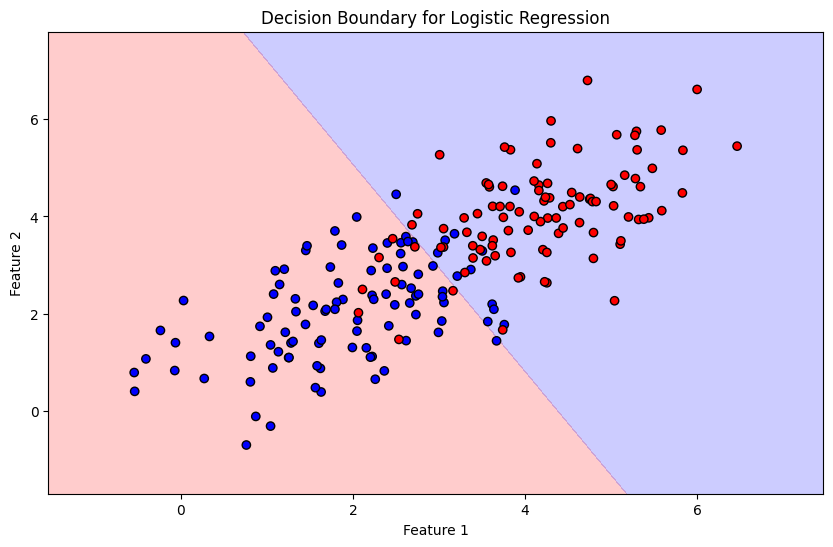

In [26]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and predict probabilities
grid = np.c_[xx.ravel(), yy.ravel()]
probs = np.array(model.predict_proba(grid)).reshape(xx.shape)

# Plot the contour and training data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Decision Boundary for Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Conclusion
In this notebook, we implemented logistic regression using synthetic data. We started by understanding the math behind logistic regression, including the sigmoid function and binary cross-entropy loss. We then applied gradient descent to optimize weights and bias, tracked performance over epochs, and visualized the decision boundary.

This foundational understanding is essential before using high-level libraries like scikit-learn or moving on to neural networks, where logistic regression forms the building block of binary classification.
